# **Final Project**
### **ADS 504 Machine Learning**
__Team 6:__ Lai Ieng Chan, Christopher Garcia, Katie Hu

## **Import of Packages and Libraries**

In [ ]:
# Libraries and Packages
import seaborn as sns
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.style.use('ggplot')
sns.set_style('white')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score,classification_report, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import plot_roc_curve
from mlxtend.plotting import plot_decision_regions
from mlxtend.evaluate import bootstrap_point632_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')


## **Load Data**

In [ ]:
# Load Churn Dataset
churn = pd.read_csv("/content/Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Summary Information about the variables and their types in the data:**

*  customerid: A unique ID that identifies each customer.
*  Surname : The surname of the customer
*  CreditScore : The credit score of the customer
*  Geography : The country of the customer(Germany/France/Spain)
*  Gender : The gender of the customer (Female/Male)
*  Age : The age of the customer
*  Tenure : The customer's number of years in the bank
*  Balance : The customer's account balance
*  NumOfProducts : The number of bank products that the customer uses
*  HasCrCard : Does the customer has a card? (0=No,1=Yes)
*  IsActiveMember : Does the customer has an active mebership (0=No,1=Yes)
*  EstimatedSalary : The estimated salary of the customer
*  Exited : Churned or not? (0=No,1=Yes)

## **Exploratory Data Analysis**

In [ ]:
# Removing the 'rownumber', 'CustomerId', 'Surname' since they do not represent useful information in the classification analysis
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
# View columns, dimensions, and data types
print('General Stats:')
churn.info()

General Stats:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# The dimension of the dataset
print('Number of Rows:', churn.shape[0])
print('Number of Columns:', churn.shape[1])

Number of Rows: 10000
Number of Columns: 11


In [ ]:
# Subsetting the numerical features 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary' and 'NumOfProducts' into a dataset
numerical = churn[['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary','NumOfProducts']]

In [ ]:
# Retunrs decription of the dataset
numerical.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,1.530200
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.581654
min,350.000000,18.000000,0.000000,0.000000,11.580000,1.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,1.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,2.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,4.000000


### **Exited (Target Class)**

In [ ]:
# Check Exited Class Distribution
# 0 = Customers Retained
# 1 = Customers Closed Accounts
churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

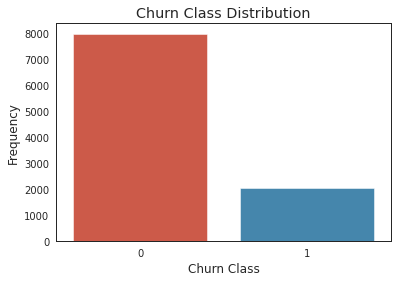

In [ ]:
# Plot Class Distribution
sns.countplot(data = churn, x = 'Exited')
plt.xlabel('Churn Class')
plt.ylabel('Frequency')
plt.title('Churn Class Distribution')
# plt.show()
plt.savefig('Churn Class Distribution.png')

**Can we see that there is a class imbalancement in the data? Resample data so that there is 50/50 class balance. For this problem, would class imbalancement have an effect? There are still enough negative and positive classes for training. More customers seem to churn than to stay with their bank.**

### **Credit Score**

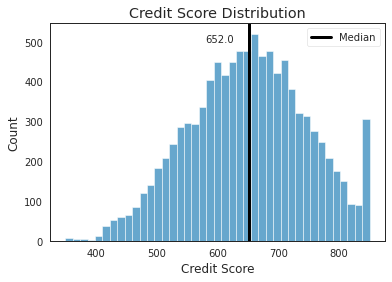

In [ ]:
# Plot Credit Score
sns.set_style('white')
sns.histplot(data = churn, x = 'CreditScore', palette = 'colorblind')
plt.axvline(x = churn.CreditScore.median(), linewidth = 3, color = 'black', label = "Median", alpha = 1)
plt.text(580, 500, churn.CreditScore.median(), rotation = 0)
plt.xlabel('Credit Score')
plt.ylabel('Count')
legend = ['Median']
plt.legend(legend)
plt.title('Credit Score Distribution')
plt.show()

This appears normal since most of the value falls between the 600 - 700 range. 

### **Numerical Features Distribution**

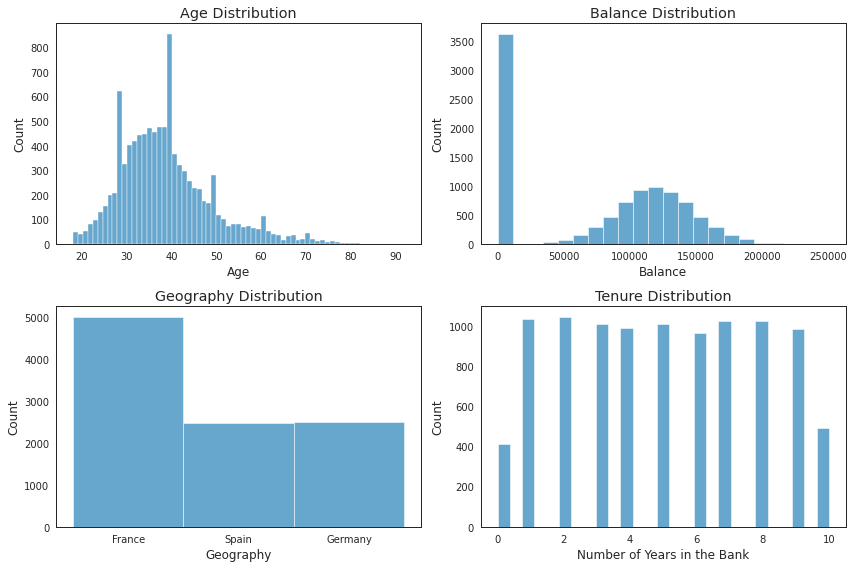

In [ ]:
# Plot Features
%matplotlib inline

f, axs = plt.subplots(2, 2, figsize = (12, 8))
# Age
sns.histplot(data = churn, x = 'Age', ax = axs[0,0])

# Account Balance Distribution
sns.histplot(data = churn, x = 'Balance', ax = axs[0,1])

# Geography
sns.histplot(data = churn, x = 'Geography', ax = axs[1,0])

# Tenure
sns.histplot(data = churn, x = 'Tenure', ax = axs[1,1])
plt.xlabel('Number of Years in the Bank')

axs[0, 0].title.set_text("Age Distribution")
axs[0, 1].title.set_text("Balance Distribution")
axs[1, 0].title.set_text("Geography Distribution")
axs[1, 1].title.set_text("Tenure Distribution")

plt.tight_layout()

### **Estimated Salary**

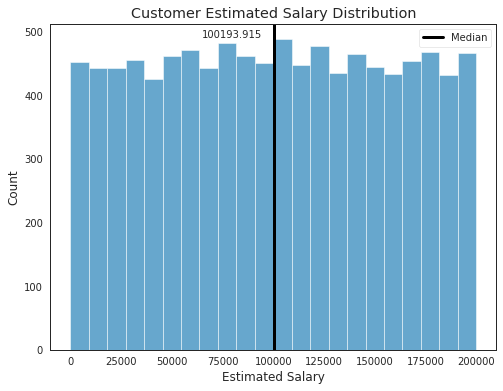

In [ ]:
# Plot Estimated Salary
plt.subplots(figsize = (8,6))
sns.histplot(data = churn, x = 'EstimatedSalary')
plt.xlabel('Estimated Salary of Customer')
plt.ylabel('Count')
plt.title('Customer Estimated Salary Distribution')
plt.axvline(x = churn.EstimatedSalary.median(), linewidth = 3, color = 'black', label = "Median", alpha = 1)
plt.text(65000, 490, churn.EstimatedSalary.median(), rotation = 0)
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
legend = ['Median']
plt.legend(legend)
plt.title('Customer Estimated Salary Distribution')
plt.show()

### **Number of Products**

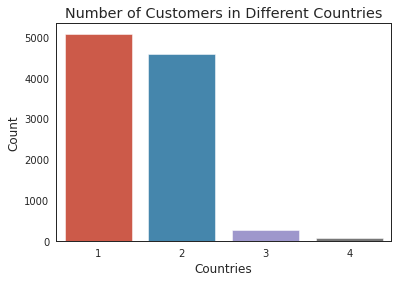

In [ ]:
# Plot number of products customers have
sns.countplot(data = churn, x = 'NumOfProducts')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Number of Customers in Different Countries')
plt.show()

### **Has Credit Card**

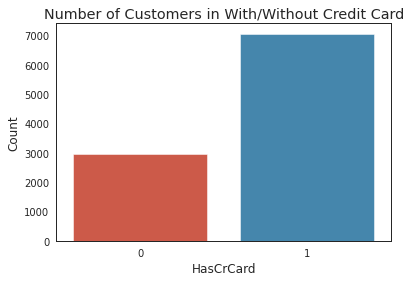

In [ ]:
# Plot whether customers have credit card
# 0 = Customers has credit card
# 1 = Customers do not have credit card

sns.countplot(data = churn, x = 'HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.title('Number of Customers in With/Without Credit Card')
plt.show()

### **Is Active Member**

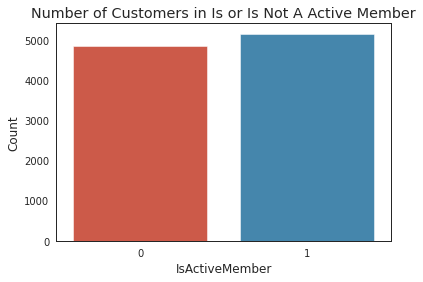

In [ ]:
# Plot whether customers is active member
# 0 = Customers is active member
# 1 = Customers is not active member

sns.countplot(data = churn, x = 'IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Number of Customers in Is or Is Not A Active Member')
plt.show()

### **Geography**

**Does location have an effect on churning?**

In [ ]:
# Group and summarize data, count the number of churners and non-churners by country 
churn.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

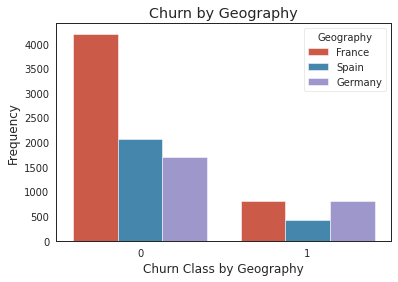

In [ ]:
# Visualize the distribution of geography differences
sns.countplot(data = churn, x = 'Exited', hue = 'Geography')
plt.xlabel('Churn Class by Geography') 
plt.ylabel('Frequency')
plt.title('Churn by Geography')
plt.show()

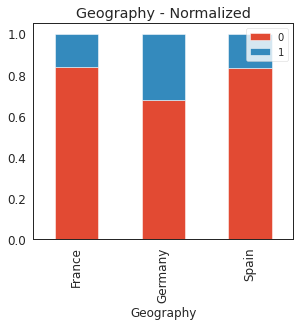

In [ ]:
# Normalized Bar Charts for Geography
crosstab_geography = pd.crosstab(churn['Geography'], churn['Exited'])
crosstab_geography_norm = crosstab_geography.div(crosstab_geography.sum(axis = 1), axis = 0)

fig = plt.figure(figsize = (8, 12))
ax2 = fig.add_subplot(3, 2, 2)

plot_geog = crosstab_geography_norm.plot(kind = 'bar', stacked = True, title = 'Geography - Normalized', fontsize = 12, ax = ax2)

fig.tight_layout(pad = 1)
ax2.legend(loc = 'upper right')

**After looking at the amount of customers who churned in the three different countries, it looks like customers in Germany churn more than France and Spain..**

### **Gender**

**Does gender have an effect on churning?**

In [ ]:
# Group and summarize data, count the number of churners and non-churners by gender
churn.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

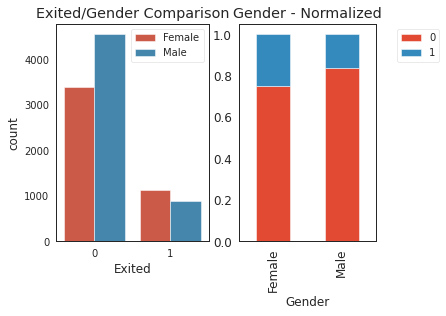

<Figure size 864x720 with 0 Axes>

In [ ]:
# Visualize Gender Differences

crosstab_gender = pd.crosstab(churn['Gender'], churn['Exited'])
crosstab_gender_norm = crosstab_gender.div(crosstab_gender.sum(axis = 1), axis = 0)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig = plt.figure(figsize = (12, 10))

plot_gender = sns.countplot(data = churn, x = 'Exited', hue = 'Gender', ax = ax1)
plot_gender_norm = crosstab_gender_norm.plot(kind = 'bar', stacked = True, title = 'Gender - Normalized', fontsize = 12, ax = ax2)

fig.tight_layout(pad = 1)
ax1.title.set_text("Exited/Gender Comparison")
ax1.legend(loc = 'upper right')
pos = ax2.get_position()
ax2.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax2.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

### **Correlation Matrix**

In [ ]:
# Change Gender and Geography to Nominal

churn_corr = churn

churn_corr['Gender'] = churn_corr['Gender'].replace({'Male': '0',
                                        'Female': '1'})

churn_corr['Geography'] = churn_corr['Geography'].replace({'France': '0',
                                               'Spain': '1',
                                               'Germany': '2'})

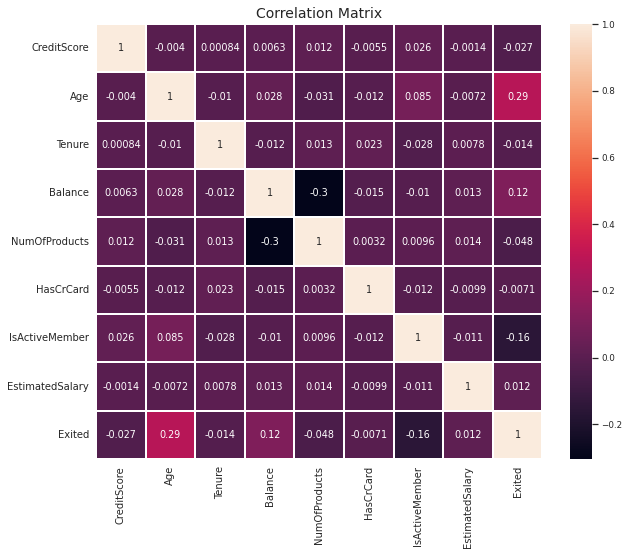

In [ ]:
corrMatrix = churn_corr.corr()
plt.subplots(figsize = (10,8))
sns.set(font_scale = .8)
sns.heatmap(corrMatrix, annot = True, linewidths = 1)
plt.title(r'Correlation Matrix', fontsize = 14)
plt.savefig('Correlation Matrix')

## **Pre-process Data**

In [ ]:
# Check for missing values
churn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**There are no missing values in the dataset, therefore, no additional pre-processing needs to be done with the missing values.**

In [ ]:
  # Grab the target class 'Exited' and store them to 'y'
y = churn['Exited']

# Grab the remaining features and store them to 'X'
X = churn[churn.columns[:-1]]

### **One-hot encoding**

In [ ]:
# One-hot encoding
ohe = OneHotEncoder(sparse=False).fit(X[['Gender', 'Geography','HasCrCard','IsActiveMember']])

cat_df = pd.DataFrame(ohe.transform(X[['Gender', 'Geography','HasCrCard','IsActiveMember']]), 
                      columns=ohe.get_feature_names_out(['Gender', 'Geography','HasCrCard','IsActiveMember']))

cat_df

,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9997,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
# Concat the categoricals and numericals features in X
fc_columns = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary','NumOfProducts']
X_encoded = pd.concat([X[fc_columns], cat_df], axis=1)

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,608,41,1,83807.86,112542.58,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,502,42,8,159660.80,113931.57,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,699,39,1,0.00,93826.63,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,850,43,2,125510.82,79084.10,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### **Train Test Split**

In [ ]:
# Split data to 90% for training with the random state of 42
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size=0.3, 
                                                    random_state=42)                                             

### **Feature Scaling**

In [ ]:
# Feature scaling transformation
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### **Baseline Model**

In [ ]:
# Build simple logistic regression model as baseline
# Fit model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate model on test set and compare to trian set, we will 
# look at different metrics before deciding what overall metric 
# to use for final model, depending on our needs
train_pred = log_reg.predict(X_train) 
test_pred = log_reg.predict(X_test)

train_score = accuracy_score(train_pred, y_train)
test_score = accuracy_score(test_pred, y_test)

# Probability values
train_prob = log_reg.predict_proba(X_train)
test_prob = log_reg.predict_proba(X_test)

print('Training Set Accuracy:{}'.format(round(train_score, 2)))
print('Test Set Accuracy:{}'.format(round(test_score, 2)))

Training Set Accuracy:0.81
Test Set Accuracy:0.81


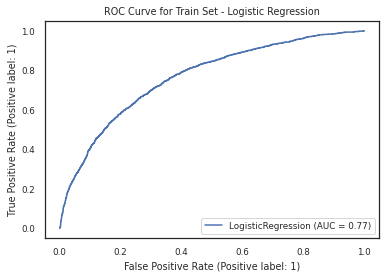

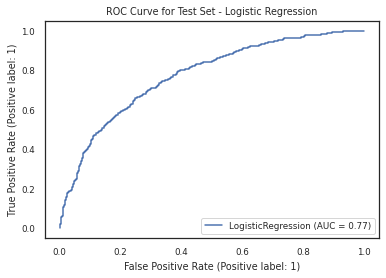

In [ ]:
# Plot ROC curve
sns.set_style('white')
plot_roc_curve(log_reg, X_train, y_train)
plt.title('ROC Curve for Train Set - Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Test Set - Logistic Regression')
plt.show()

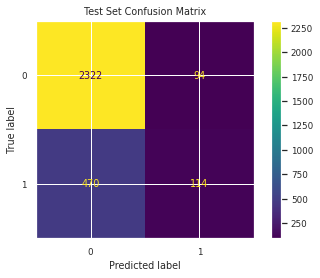

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(log_reg, X_test, y_test)
plt.title('Test Set Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print('Classificaiton Summary for Test Set::')
print(classification_report(y_test, test_pred))

Classificaiton Summary for Test Set::
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.55      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



## **Modeling**

### **Random Forest**

In [ ]:
# Create a random forest model
rf = RandomForestClassifier(n_estimators=100, 
                            max_features=10,
                            max_depth=3)

# Fit on training data
rf = rf.fit(X_train, y_train) 

# Prediction on Training/Test Dataset
rf_train_pred = rf.predict(X_train) 
rf_test_pred = rf.predict(X_test)

# Accuracy score on Training/Test Dataset
rf_train_score = accuracy_score(rf_train_pred, y_train)
rf_test_score = accuracy_score(rf_test_pred, y_test)

print('Training Set Accuracy - Random Forest:{}'.format(round(rf_train_score, 2)))
print('Test Set Accuracy - Random Forest:{}'.format(round(rf_test_score, 2)))

Training Set Accuracy - Random Forest:0.84
Test Set Accuracy - Random Forest:0.85


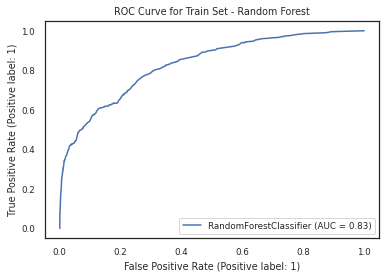

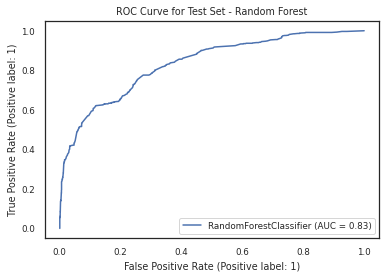

In [ ]:
# Plot ROC curve
sns.set_style('white')
plot_roc_curve(rf, X_train, y_train)
plt.title('ROC Curve for Train Set - Random Forest')

plot_roc_curve(rf, X_test, y_test)
plt.title('ROC Curve for Test Set - Random Forest')
plt.savefig('RF ROC Curve - Test')

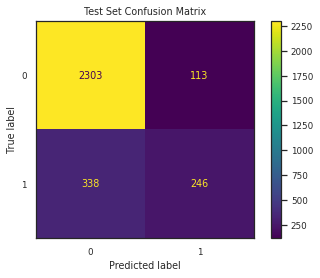

In [ ]:
# Confusion Matrix
plot_confusion_matrix(rf, X_test, y_test)
plt.title('Test Set Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print('Classificaiton Summary for Test Set:')
print(classification_report(y_test, rf_test_pred))

Classificaiton Summary for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2416
           1       0.69      0.42      0.52       584

    accuracy                           0.85      3000
   macro avg       0.78      0.69      0.72      3000
weighted avg       0.84      0.85      0.84      3000



### **k-Nearest Neighbors**

In [ ]:
#This function is supposed to create and test a KNN model
def k_neighbors(xtrain, ytrain, xtest, ytest, kvalues, metric):
  knn_accuracy = []
  clfs = []
  for i in kvalues:
    clf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(xtrain, ytrain)
    clf_train_pred = clf.predict(xtrain)
    clf_test_pred = clf.predict(xtest)
    clfs.append(clf)
    knn_accuracy.append({'k values': i,
    'Training Accuracy':accuracy_score(clf_train_pred,ytrain),
    'Test Accuracy': accuracy_score(clf_test_pred,ytest)})
  return pd.DataFrame(knn_accuracy), clfs

In [ ]:
# The Euclidean distance function is selected  
# Define the range of 1 to 10 and the type as Euclidean
knn_euc_acc, knn_euc_clfs = k_neighbors(X_train, y_train, 
                                        X_test, y_test, range(1,10,2), metric='euclidean')   
display(knn_euc_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.792333
1,3,0.896571,0.823000
2,5,0.871571,0.827333
3,7,0.858714,0.831333
4,9,0.852571,0.837667


In [ ]:
# Create a K-Nearest model
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=9)

# Fit on training data
knn = knn.fit(X_train, y_train) 

# Prediction on Training/Test Dataset
knn_train_pred = knn.predict(X_train) 
knn_test_pred = knn.predict(X_test)

# Accuracy score on Training/Test Dataset
knn_train_score = accuracy_score(knn_train_pred, y_train)
knn_test_score = accuracy_score(knn_test_pred, y_test)

print('Training Set Accuracy - KNN:{}'.format(round(knn_train_score, 2)))
print('Test Set Accuracy - KNN:{}'.format(round(knn_test_score, 2)))

Training Set Accuracy - KNN:0.85
Test Set Accuracy - KNN:0.84


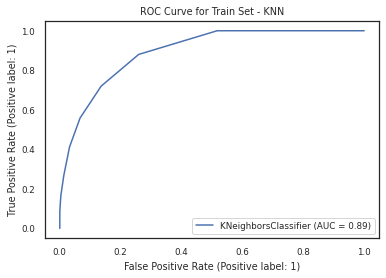

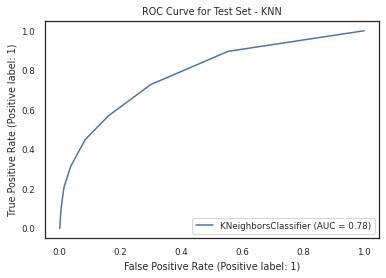

In [ ]:
# Plot ROC curve
plot_roc_curve(knn, X_train, y_train)
plt.title('ROC Curve for Train Set - KNN')

plot_roc_curve(knn, X_test, y_test)
plt.title('ROC Curve for Test Set - KNN')
plt.savefig('KNN ROC Curve - Test')

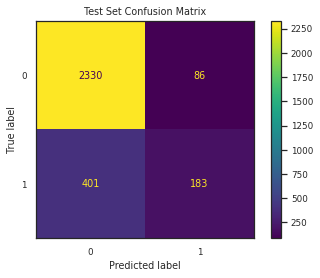

In [ ]:
# Confusion Matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Test Set Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print('Classificaiton Summary for Test Set:')
print(classification_report(y_test, knn_test_pred))

Classificaiton Summary for Test Set:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2416
           1       0.68      0.31      0.43       584

    accuracy                           0.84      3000
   macro avg       0.77      0.64      0.67      3000
weighted avg       0.82      0.84      0.81      3000



### **SVM**

Method - Using SVM Kernels

In [ ]:
# Poly Kernel - Quadratic Curve to Separate Classes
svm_p = svm.SVC(kernel='poly', degree=2)
svm_p = svm_p.fit(X_train, y_train)

# Linear Kernel - Straight Line to Separate Classes
svm_l = svm.SVC(kernel = 'linear')
svm_l = svm_l.fit(X_train, y_train)

# RBF Kernel - Radial Basis Function to Separate Classes
svm_r = svm.SVC(kernel = 'rbf')
svm_r = svm_r.fit(X_train, y_train)

# Accuracy Predictions 
svm_p_train_pred = svm_p.predict(X_train)
svm_p_test_pred = svm_p.predict(X_test)

svm_l_train_pred = svm_l.predict(X_train)
svm_l_test_pred = svm_l.predict(X_test)

svm_r_train_pred = svm_r.predict(X_train)
svm_r_test_pred = svm_r.predict(X_test)

print('SVM - Poly - Accuracy - Train %2.2f ' %accuracy_score(y_train, svm_p.predict(X_train)))
print('SVM - Poly - Accuracy - Test %2.2f ' %accuracy_score(y_test, svm_p.predict(X_test)))
print('SVM - Linear - Accuracy - Train %2.2f ' %accuracy_score(y_train, svm_l.predict(X_train)))
print('SVM - Linear - Accuracy - Test %2.2f ' %accuracy_score(y_test, svm_l.predict(X_test)))
print('SVM - RBF - Accuracy - Train %2.2f ' %accuracy_score(y_train, svm_r.predict(X_train)))
print('SVM - RBF - Accuracy - Test %2.2f ' %accuracy_score(y_test, svm_r.predict(X_test)))

SVM - Poly - Accuracy - Train 0.82 
SVM - Poly - Accuracy - Test 0.83 
SVM - Linear - Accuracy - Train 0.79 
SVM - Linear - Accuracy - Test 0.81 
SVM - RBF - Accuracy - Train 0.86 
SVM - RBF - Accuracy - Test 0.86 


In [ ]:
# Testing Accuracies of Best Accuracy Performance SVM - RBF

C = [0.01, 0.10, 1.0, 10.0, 100.0]
accuracy_results = []
for i in C:
  svm_rbf = svm.SVC(kernel = 'rbf', C = i, random_state = 42)
  svm_rbf.fit(X_train, y_train)
  svm_rbf_train_pred = svm_rbf.predict(X_train)
  svm_rbf_test_pred = svm_rbf.predict(X_test)
  train_acc = accuracy_score(svm_rbf_train_pred, y_train)
  test_acc = accuracy_score(svm_rbf_test_pred, y_test)

  # Test Accuracy using C Parameter Features from Training:
  accuracy_results.append({'C Param': i, 'Training Accuracy': round(train_acc, 2), 'Test Accuracy': round(test_acc, 2)})

In [ ]:
# Look into Accuracies
results = pd.DataFrame(accuracy_results)
results

,C Param,Training Accuracy,Test Accuracy
0,0.01,0.79,0.81
1,0.10,0.83,0.84
2,1.00,0.86,0.86
3,10.00,0.88,0.87
4,100.00,0.92,0.84


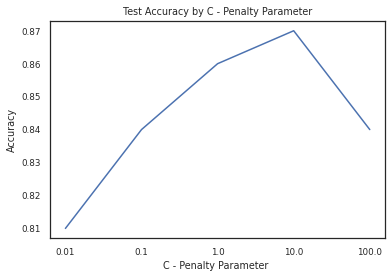

In [ ]:
# Plot it here
sns.set_style("white")
plt.plot(results['Test Accuracy'], label = 'Test Accuracy')
plt.xticks(range(len(results['C Param'])), results['C Param'])
plt.xlabel('C - Penalty Parameter ')
plt.ylabel('Accuracy')
plt.title('Test Accuracy by C - Penalty Parameter')
plt.savefig('Test Accuracy by C - Penalty Parameter')

SVM Selected with Parameters C: 10, Kernel: RBF, Random State: 42

In [ ]:
# Train Classifier
svm_C = svm.SVC(kernel = 'rbf', C = 10, random_state = 42)
svm_C.fit(X_train, y_train)
svm_C_train_pred = svm_C.predict(X_train)
svm_C_test_pred = svm_C.predict(X_test)

In [ ]:
# Confusion Matrix on Test
exited_labels = ['Exited - 1', 'Not Exited - 0']
svm_cm = confusion_matrix(y_test, svm_C.predict(X_test))
pd.DataFrame(svm_cm, index = exited_labels, columns = exited_labels)

,Exited - 1,Not Exited - 0
Exited - 1,2326,90
Not Exited - 0,312,272


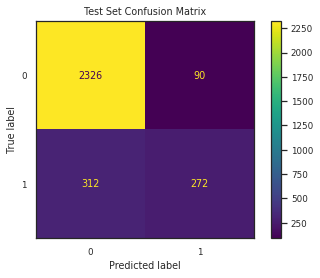

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(svm_C, X_test, y_test)
plt.title('Test Set Confusion Matrix')
plt.show()

In [ ]:
# Accuracy Scores
svm_C_train_pred = svm_C.predict(X_train)
svm_C_test_pred = svm_C.predict(X_test)
print('SVM Accuracy - Train %2.2f ' %accuracy_score(y_train, svm_C.predict(X_train)))
print('SVM Accuracy - Test %2.2f ' %accuracy_score(y_test, svm_C.predict(X_test)))

SVM Accuracy - Train 0.88 
SVM Accuracy - Test 0.87 


In [ ]:
# Classification Report for Test Set
print('Classification Summary for Test Set - SVM')
print(classification_report(y_test, svm_C_test_pred))

Classification Summary for Test Set - SVM
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



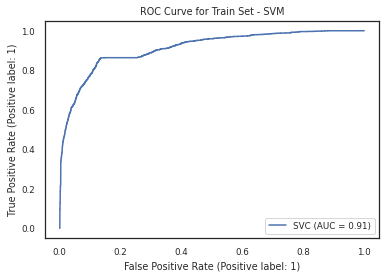

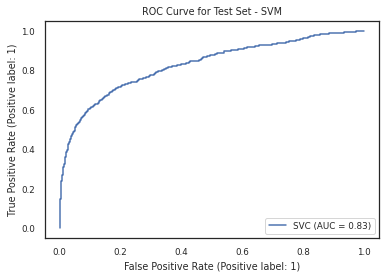

In [ ]:
# Plot ROC curve
plot_roc_curve(svm_C, X_train, y_train)
plt.title('ROC Curve for Train Set - SVM')

plot_roc_curve(svm_C, X_test, y_test)
plt.title('ROC Curve for Test Set - SVM') 

plt.show()

Method - Using SGD Classifier

In [ ]:
# Train Classifier
clf = make_pipeline(SGDClassifier(max_iter=1000))
clf = clf.fit(X_train, y_train)

In [ ]:
# Confusion Matrix on Test
exited_labels = ['Exited - 1', 'Not Exited - 0']
clf_cm = confusion_matrix(y_test, clf.predict(X_test))
pd.DataFrame(clf_cm, index = exited_labels, columns = exited_labels)

,Exited - 1,Not Exited - 0
Exited - 1,2409,7
Not Exited - 0,579,5


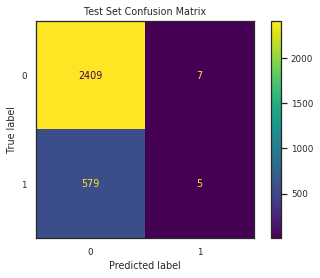

In [ ]:
# Confusion Matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Test Set Confusion Matrix')
plt.savefig('SVM Confusion Matrix - Test Set')

In [ ]:
# Predict Accuracy Scores
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)
print('SGD Classifier Accuracy - Train %2.2f ' %accuracy_score(y_train, clf.predict(X_train)))
print('SGD Classifier Accuracy - Test %2.2f ' %accuracy_score(y_test, clf.predict(X_test)))

SGD Classifier Accuracy - Train 0.79 
SGD Classifier Accuracy - Test 0.80 


In [ ]:
# Classification Report for Test Set
print('Classification Summary for Test Set - SGD Classifier')
print(classification_report(y_test, clf_test_pred))

Classification Summary for Test Set - SGD Classifier
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.42      0.01      0.02       584

    accuracy                           0.80      3000
   macro avg       0.61      0.50      0.45      3000
weighted avg       0.73      0.80      0.72      3000



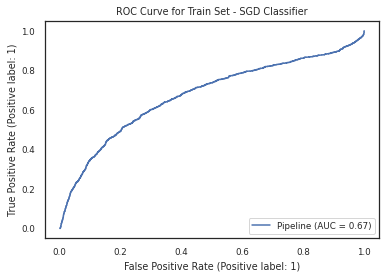

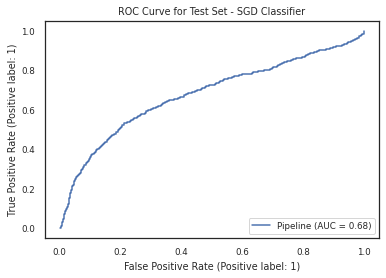

In [ ]:
# Plot ROC curve
plot_roc_curve(clf, X_train, y_train)
plt.title('ROC Curve for Train Set - SGD Classifier')

plot_roc_curve(clf, X_test, y_test)
plt.title('ROC Curve for Test Set - SGD Classifier') 
plt.show()

### **Perceptron**

Method 1: Scikit-Learn Perceptron

In [ ]:
# Train Classifier
perc = Perceptron(max_iter = 1000).fit(X_train, y_train)

# Confusion Matrix on Test
exited_labels = ['Exited - 1', 'Not Exited - 0']
perc_cm = confusion_matrix(y_test, perc.predict(X_test))
pd.DataFrame(perc_cm, index = exited_labels, columns = exited_labels)

,Exited - 1,Not Exited - 0
Exited - 1,2022,394
Not Exited - 0,427,157


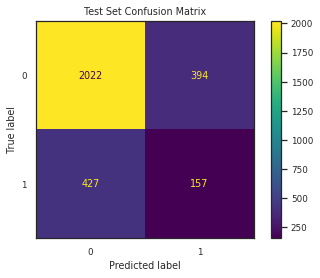

In [ ]:
# Confusion Matrix Plot on Test
plot_confusion_matrix(perc, X_test, y_test)
plt.title('Test Set Confusion Matrix')
plt.savefig('Perceptron Confusion Matrix - Test Set')

In [ ]:
# Accuracy on Test
perc_train_pred = perc.predict(X_train)
perc_test_pred = perc.predict(X_test)
print('Scikit-Learn Perceptron Accuracy - Train %2.2f ' %accuracy_score(y_train, perc.predict(X_train)))
print('Scikit-Learn Perceptron Accuracy - Test %2.2f ' %accuracy_score(y_test, perc.predict(X_test)))

Scikit-Learn Perceptron Accuracy - Train 0.72 
Scikit-Learn Perceptron Accuracy - Test 0.73 


In [ ]:
# Classification Report for Test Set
print('Classification Summary for Test Set - Scikit-Learn Perceptron')
print(classification_report(y_test, perc_test_pred))

Classification Summary for Test Set - Scikit-Learn Perceptron
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2416
           1       0.28      0.27      0.28       584

    accuracy                           0.73      3000
   macro avg       0.56      0.55      0.55      3000
weighted avg       0.72      0.73      0.72      3000



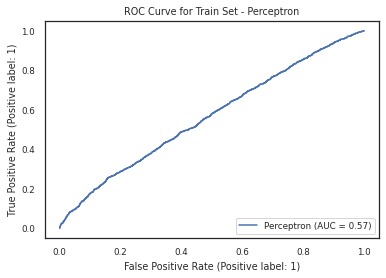

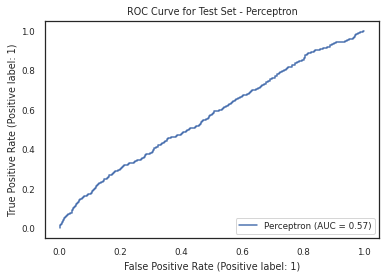

In [ ]:
# Plot ROC curve
plot_roc_curve(perc, X_train, y_train)
plt.title('ROC Curve for Train Set - Perceptron')

plot_roc_curve(perc, X_test, y_test)
plt.title('ROC Curve for Test Set - Perceptron') 
plt.show()

Method 2: Pipeline - Balanced and Unbalanced with Perceptron

In [ ]:
# Balanced and Unbalanced Pipelines - Train Classifiers
balanced_model = make_pipeline(Perceptron(class_weight='balanced'))
unbalanced_model = make_pipeline(Perceptron())

bf = balanced_model.fit(X_train, y_train)
ubf = unbalanced_model.fit(X_train, y_train)

In [ ]:
# Accuracy on Test for Balanced
bf_train_pred = bf.predict(X_train)
bf_test_pred = bf.predict(X_test)
print('Balanced Perceptron Accuracy - Train %2.2f ' %accuracy_score(y_train, bf.predict(X_train)))
print('Balanced Perceptron Accuracy - Test %2.2f ' %accuracy_score(y_test, bf.predict(X_test)))

Balanced Perceptron Accuracy - Train 0.62 
Balanced Perceptron Accuracy - Test 0.61 


In [ ]:
# Classification Report for Test Set
print('Classification Summary for Test Set - Balanced Perceptron')
print(classification_report(y_test, bf_test_pred))

Classification Summary for Test Set - Balanced Perceptron
              precision    recall  f1-score   support

           0       0.88      0.60      0.71      2416
           1       0.28      0.66      0.40       584

    accuracy                           0.61      3000
   macro avg       0.58      0.63      0.55      3000
weighted avg       0.76      0.61      0.65      3000



Confusion Matrix - Balanced


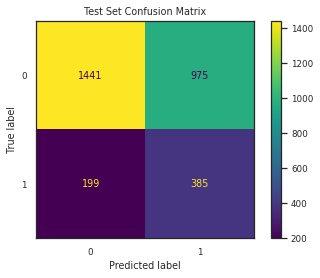

In [ ]:
# Confusion Matrix
print('Confusion Matrix - Balanced')
plot_confusion_matrix(bf, X_test, y_test) 
plt.title('Test Set Confusion Matrix')
plt.show()

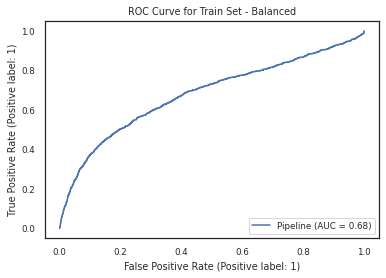

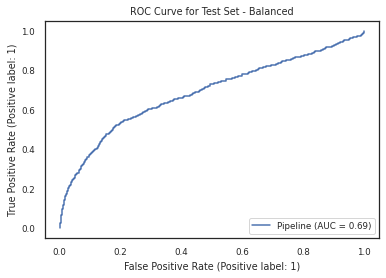

In [ ]:
# Plot ROC curve for Balanced
plot_roc_curve(bf, X_train, y_train)
plt.title('ROC Curve for Train Set - Balanced')

plot_roc_curve(bf, X_test, y_test)
plt.title('ROC Curve for Test Set - Balanced') 
plt.show()

In [ ]:
# Accuracy on Test for Unbalanced
ubf_train_pred = ubf.predict(X_train)
ubf_test_pred = ubf.predict(X_test)
print('Unbalanced Perceptron Accuracy - Train %2.2f ' %accuracy_score(y_train, ubf.predict(X_train)))
print('Unbalanced Perceptron Accuracy - Test %2.2f ' %accuracy_score(y_test, ubf.predict(X_test)))

Unbalanced Perceptron Accuracy - Train 0.72 
Unbalanced Perceptron Accuracy - Test 0.73 


In [ ]:
# Classification Report for Test Set
print('Classification Summary for Test Set - Unbalanced Perceptron')
print(classification_report(y_test, ubf_test_pred))

Classification Summary for Test Set - Unbalanced Perceptron
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2416
           1       0.28      0.27      0.28       584

    accuracy                           0.73      3000
   macro avg       0.56      0.55      0.55      3000
weighted avg       0.72      0.73      0.72      3000



Confusion Matrix - Unbalanced


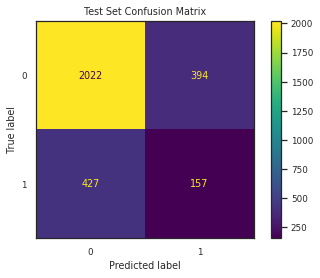

In [ ]:
# Confusion Matrix
print('Confusion Matrix - Unbalanced')
plot_confusion_matrix(ubf, X_test, y_test) 
plt.title('Test Set Confusion Matrix')
plt.show()

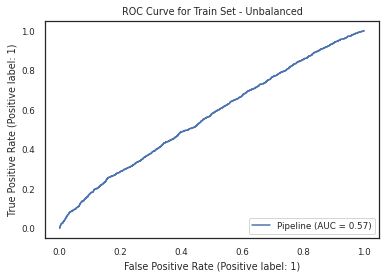

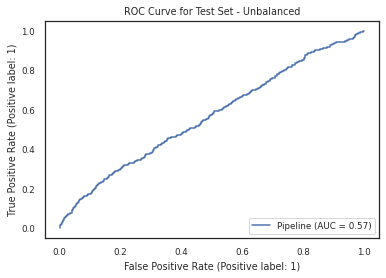

In [ ]:
# Plot ROC curve for Unbalanced
plot_roc_curve(ubf, X_train, y_train)
plt.title('ROC Curve for Train Set - Unbalanced')

plot_roc_curve(ubf, X_test, y_test)
plt.title('ROC Curve for Test Set - Unbalanced')
plt.show()

### **Artificial Neural Network**

In [ ]:
# Instantiate model 
n_net = MLPClassifier(hidden_layer_sizes=(100),  # Default hidden layers 
                      solver='adam',
                      activation='relu',
                      random_state=42)
n_net.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=100, random_state=42)

In [ ]:
# Prediction on Training/Test Dataset
nnet_train_pred = n_net.predict(X_train) 
nnet_test_pred = n_net.predict(X_test)

# Accuracy score on Training/Test Dataset
nnet_train_score = accuracy_score(nnet_train_pred, y_train)
nnet_test_score = accuracy_score(nnet_test_pred, y_test)

print('Training Set Accuracy MLP: {}'.format(round(nnet_train_score, 2)))
print('Test Set Accuracy MLP: {}'.format(round(nnet_test_score, 2)))

Training Set Accuracy MLP: 0.88
Test Set Accuracy MLP: 0.86


Confusion Matrix - Neural Network


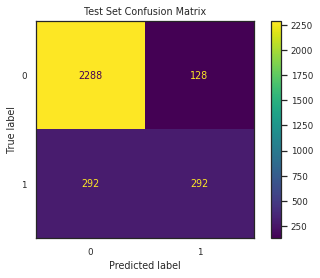

In [ ]:
# Confusion Matrix
print('Confusion Matrix - Neural Network')
plot_confusion_matrix(n_net, X_test, y_test) 
plt.title('Test Set Confusion Matrix')
plt.savefig('NN - Confusion Matrix')

In [ ]:
# Optimized and tuned NN 
tune_nnet = MLPClassifier(hidden_layer_sizes=(150,100,50),  # change hidden layers 
                      solver='adam',
                      activation='relu',
                      random_state=42)
tune_nnet.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=42)

In [ ]:
# Prediction on Training/Test Dataset
tuneNN_train_pred = tune_nnet.predict(X_train) 
tuneNN_test_pred = tune_nnet.predict(X_test)

# Accuracy score on Training/Test Dataset
tuneNN_train_score = accuracy_score(tuneNN_train_pred, y_train)
tuneNN_test_score = accuracy_score(tuneNN_test_pred, y_test)

print('Training Set Accuracy Tune MLP: {}'.format(round(tuneNN_train_score, 2)))
print('Test Set Accuracy Tune MLP: {}'.format(round(tuneNN_test_score, 2)))

Training Set Accuracy Tune MLP: 0.98
Test Set Accuracy Tune MLP: 0.82


In [ ]:
# Classification Report for non-tuned NN
print('Classification Summary Neural Networks')
print(classification_report(y_test, nnet_test_pred))

Classification Summary Neural Networks
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.70      0.50      0.58       584

    accuracy                           0.86      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



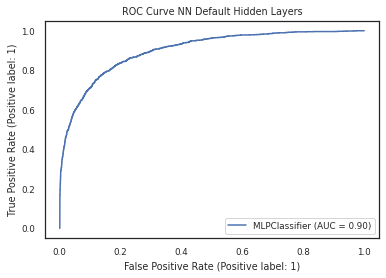

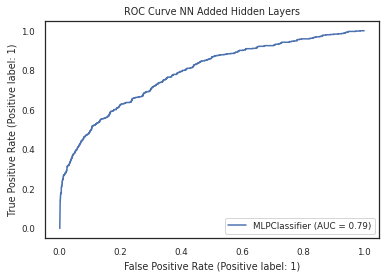

In [ ]:
# Plot ROC curve both tuned and non-tuned NN
plot_roc_curve(n_net, X_train, y_train)
plt.title('ROC Curve NN Default Hidden Layers')
plt.savefig('NN - ROC Curve')

plot_roc_curve(tune_nnet, X_test, y_test)
plt.title('ROC Curve NN Added Hidden Layers')
plt.show()